In [71]:
import numpy as np
import skimage.io as io
import pickle


from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tools.utils import draw_bbboxes, xyxy_to_xywh, xywh_to_xyxy


In [12]:
coco_train = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_train2017.json")

loading annotations into memory...
Done (t=35.17s)
creating index...
index created!


In [40]:

coco_cat_to_continous_cat = {v: i+1 for i,v in enumerate(coco_train.getCatIds())}
continious_cat_to_coco = {v:k for k,v in coco_cat_to_continous_cat.items()}

In [41]:
db = np.load("images/threshold_study/final_feature_db_on_train.npy")
images, classes, bbox, features = db[:,0], db[:,2], db[:,3:7], db[:,7]

In [74]:
nearest_neighbour = np.load("images/threshold_study/nearest_neighbour_5.pkl")

In [76]:
nearest_neighbour["classes_idx"]

array([[46., 45., 51., 49., 47.],
       [46., 54., 46., 74., 46.],
       [51., 45., 47., 48., 43.],
       ...,
       [32.,  5., 38., 37., 15.],
       [18., 23., 18., 23., 18.],
       [18., 57., 23., 23., 14.]], dtype=float32)

In [68]:
def visualize(url,  bbox, class_id, filename):
    I = io.imread(url)
    # Create a Rectangle patch
    fig,ax = plt.subplots(1, figsize=(15,15))
    plt.imshow(I); plt.axis('off')
    
    x, y, w, h = bbox
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none' )
    ax.add_patch(rect)
    ax.annotate(coco_train.cats[continious_cat_to_coco[class_id]]["name"], (x+w/2,y))
    
    fig,ax = plt.subplots(1, figsize=(15,15))
    crop_img = I[int(y):int(y+h), int(x):int(x+w)]
    plt.imshow(crop_img); plt.axis('off')
    plt.savefig(filename)

In [69]:
def show(k, filename):
    filename = filename + "_" + str(k)
    img = images[k]
    bb = xyxy_to_xywh(bbox[k])
    print(bb)
    class_id = classes[k]
    url = coco_train.imgs[img]["coco_url"]
    visualize(url,  bb, class_id, filename)
    plt.axis('off')

(512.89, 271.42, 21.239990234375, 32.72998046875)


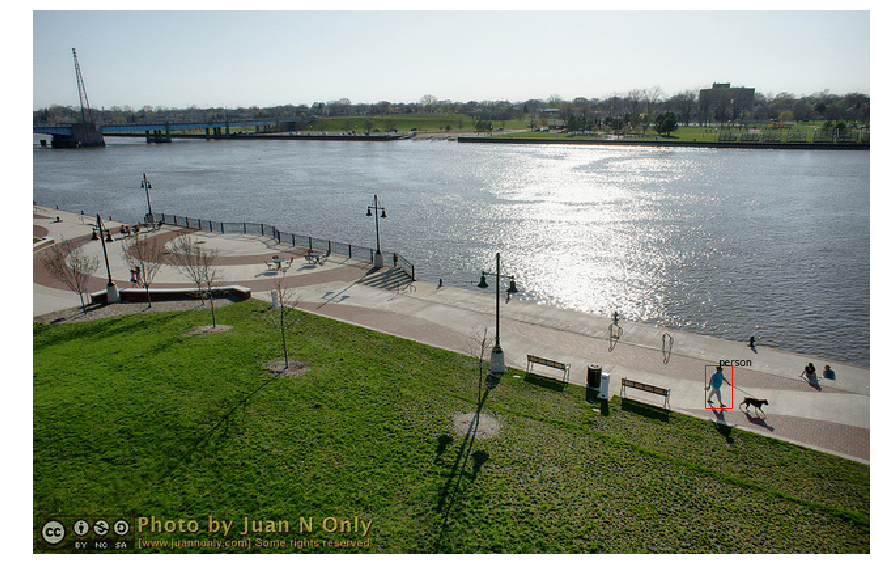

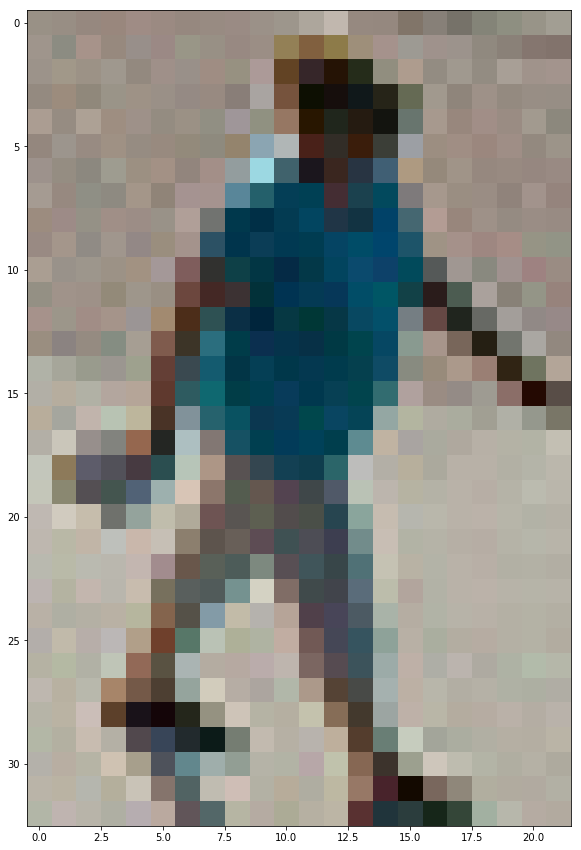

In [70]:
show(90)

In [73]:
with open("images/threshold_study/nearest_neighbour.pkl", "rb") as f:
    tmp= pickle.load(f)

EOFError: Ran out of input